<a href="https://colab.research.google.com/github/imadjamil/coursera_capstone/blob/master/coursera_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera capstone project
In this notebook, I will be working on the applied data science capstone project.

## Import section

In [86]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
#import ml_utils as mlu
#import config as cfg


print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imjamil","key":"7a7fc7ce6b90ff210a11de696b6f8888"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            821  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           3803  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           2162  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            225  
nehaprabhavalkar/india

In [12]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 97% 225M/232M [00:02<00:00, 53.8MB/s]
100% 232M/232M [00:02<00:00, 83.3MB/s]


In [ ]:
!unzip us-accidents.zip -d /content/drive/My\ Drive/colab/training/coursera/9\_Capstone/data

Archive:  us-accidents.zip
  inflating: /content/drive/My Drive/colab/training/coursera/9_Capstone/data/US_Accidents_June20.csv  


## Data processing section

In [3]:
df = pd.read_csv(r'/content/drive/My Drive/colab/training/coursera/9_Capstone/data/US_Accidents_June20.csv')
df.shape

(3513617, 49)

In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Missing values

In [5]:
df.drop(['ID', 'Source', 'Timezone', 'Airport_Code', 'Zipcode', 'Weather_Timestamp', 'Country', 'State', 'Description'],
        axis=1,
        inplace=True)

In [10]:
for col in df.columns:
  s = sum(df[col].isna())/df.shape[0]
  if s > 0.2:
    print('na in ' + col + ': ' + str(s))


na in TMC: 0.29451104090172603
na in End_Lat: 0.7054889590982739
na in End_Lng: 0.7054889590982739
na in Number: 0.6440269386219386
na in Wind_Chill(F): 0.5317167465890562
na in Precipitation(in): 0.5765779252548016


In [6]:
df.drop(['TMC', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'], 
        axis=1, 
        inplace=True)


In [12]:
for col in df.columns:
  s = sum(df[col].isna())/df.shape[0]
  if s > 0.01:
    print('na in ' + col + ': ' + str(s))

na in Temperature(F): 0.01870778744524517
na in Humidity(%): 0.01983340813754032
na in Pressure(in): 0.01590440847707647
na in Visibility(mi): 0.021589148731919274
na in Wind_Direction: 0.01675595262659533
na in Wind_Speed(mph): 0.12938490450154358
na in Weather_Condition: 0.021669407906439432


In [7]:
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(),inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(),inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(),inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(),inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(),inplace=True)

In [8]:
df.sort_values(['Start_Time', 'County', 'City'],inplace=True)
df['Weather_Condition'].fillna(method='ffill',inplace=True) 
df['Wind_Direction'].fillna(method='ffill',inplace=True)
df['Astronomical_Twilight'].fillna(method='ffill',inplace=True)
df['Nautical_Twilight'].fillna(method='ffill',inplace=True)
df['Civil_Twilight'].fillna(method='ffill',inplace=True)
df['Sunrise_Sunset'].fillna(method='ffill',inplace=True)

In [9]:
for col in df.columns:
  s = sum(df[col].isna())/df.shape[0]
  if s > 0:
    print('na in ' + col + ': ' + str(s))

na in City: 3.187598420658825e-05


In [11]:
df.shape

(3513617, 34)

In [12]:
df.dropna(axis=0, 
          inplace=True)

In [13]:
df.shape

(3513505, 34)

Date

In [14]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], infer_datetime_format=True)

In [15]:
df['year'] = df['Start_Time'].dt.year
df['month'] = df['Start_Time'].dt.month
df['day'] = df['Start_Time'].dt.day
df['hour'] = df['Start_Time'].dt.hour
df['weekday'] = df['Start_Time'].dt.weekday
df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)

Integer Encoding

In [17]:
df.select_dtypes(include=['object']).dtypes

Street                   object
Side                     object
City                     object
County                   object
Wind_Direction           object
Weather_Condition        object
Sunrise_Sunset           object
Civil_Twilight           object
Nautical_Twilight        object
Astronomical_Twilight    object
dtype: object

In [18]:
with open(r'/content/drive/My Drive/colab/training/coursera/9_Capstone/data/clean.pickle','wb') as f:
  pickle.dump(df, f)

In [91]:
with open(r'/content/drive/My Drive/colab/training/coursera/9_Capstone/data/clean.pickle','rb') as f:
  df = pickle.load(f)

In [92]:
df = df.sample(frac=0.15)
print(df.shape)
print(df.info())

In [96]:
target='Severity'
features=['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', \
          'Visibility(mi)', 'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Weather_Condition', \
          'Crossing', 'Junction', 'Traffic_Signal', \
          'year', 'month', 'day', 'hour', 'weekday']

df=df[features+[target]]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527026 entries, 2034986 to 172513
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Start_Lat          527026 non-null  float64
 1   Start_Lng          527026 non-null  float64
 2   Distance(mi)       527026 non-null  float64
 3   Side               527026 non-null  object 
 4   Temperature(F)     527026 non-null  float64
 5   Humidity(%)        527026 non-null  float64
 6   Pressure(in)       527026 non-null  float64
 7   Visibility(mi)     527026 non-null  float64
 8   Wind_Direction     527026 non-null  object 
 9   Sunrise_Sunset     527026 non-null  object 
 10  Civil_Twilight     527026 non-null  object 
 11  Weather_Condition  527026 non-null  object 
 12  Crossing           527026 non-null  bool   
 13  Junction           527026 non-null  bool   
 14  Traffic_Signal     527026 non-null  bool   
 15  year               527026 non-null  int64  
 

In [97]:
obj_cols = ['Side', 'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Weather_Condition'] 
df[obj_cols].shape

(527026, 5)

In [98]:
df_dummies = pd.get_dummies(df[obj_cols])

In [100]:
df.drop(obj_cols, axis=1, inplace=True)
df = df.join(df_dummies)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527026 entries, 2034986 to 172513
Columns: 147 entries, Start_Lat to Weather_Condition_Wintry Mix / Windy
dtypes: bool(3), float64(7), int64(6), uint8(131)
memory usage: 143.6 MB


In [101]:
df.shape

(527026, 147)

Model

In [102]:
y=df[target]
X=df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [108]:
mdl_rf=RandomForestClassifier(n_estimators=250)

mdl_rf.fit(X_train,y_train)

predictions=mdl_rf.predict(X_test)

In [110]:
accuracy_score(y_test, predictions)

print("Randon forest model, accuracy_score:",accuracy_score(y_test, predictions))
print('\n')
print('Confusion matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Classificaiton report')
print(classification_report(y_test,predictions))

Randon forest model, accuracy_score: 0.7460027323095606


Confusion matrix
[[  285   940    94     1]
 [   85 96709  9751   184]
 [   14 24524 20287   172]
 [    3  3384  1007   668]]


Classificaiton report
              precision    recall  f1-score   support

           1       0.74      0.22      0.33      1320
           2       0.77      0.91      0.83    106729
           3       0.65      0.45      0.53     44997
           4       0.65      0.13      0.22      5062

    accuracy                           0.75    158108
   macro avg       0.70      0.43      0.48    158108
weighted avg       0.73      0.75      0.72    158108



No handles with labels found to put in legend.


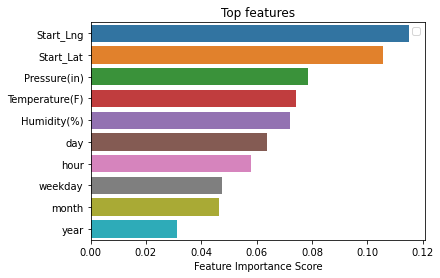

In [111]:
feature_i = pd.Series(mdl_rf.feature_importances_,index=X.columns).sort_values(ascending=False)
# k top features
k=10
sns.barplot(x=feature_i[:10], y=feature_i.index[:k])
plt.xlabel('Feature Importance Score')
plt.title("Top features")
plt.legend()
plt.show()

In [140]:
def list_feature_importance(forest, X, k):
  importances = pd.Series(forest.feature_importances_,index=X.columns).sort_values(ascending=False)
  std = np.std([pd.Series(tree.feature_importances_,index=X.columns).sort_values(ascending=False) for tree in forest.estimators_],
              axis=0)
  
  indices = np.argsort(importances)[::-1][:k]

  # Print the feature ranking
  print("Feature ranking:")

  
  #for f in range(X.shape[1]):
  for f in range(k):

      print(str(f+1) + '. ' + importances.index[indices[f]] + ": feature %d (%f)" % (indices[f], importances[indices[f]]))

  # Plot the impurity-based feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(k), importances[indices],
          color="r", yerr=std[indices], align="center")
  plt.xticks(range(k), indices)
  plt.xlim([-1, k])
  plt.show()

Feature ranking:
1. Start_Lng: feature 0 (0.115260)
2. Start_Lat: feature 1 (0.105824)
3. Pressure(in): feature 2 (0.078715)
4. Temperature(F): feature 3 (0.074326)
5. Humidity(%): feature 4 (0.072246)
6. day: feature 5 (0.063946)
7. hour: feature 6 (0.057911)
8. weekday: feature 7 (0.047329)
9. month: feature 8 (0.046330)
10. year: feature 9 (0.031096)
11. Distance(mi): feature 10 (0.030722)
12. Traffic_Signal: feature 11 (0.029056)
13. Side_R: feature 12 (0.022938)
14. Side_L: feature 13 (0.022654)
15. Visibility(mi): feature 14 (0.022333)
16. Crossing: feature 15 (0.010558)
17. Junction: feature 16 (0.008350)
18. Weather_Condition_Mostly Cloudy: feature 17 (0.007077)
19. Weather_Condition_Clear: feature 18 (0.006245)
20. Weather_Condition_Partly Cloudy: feature 19 (0.006102)


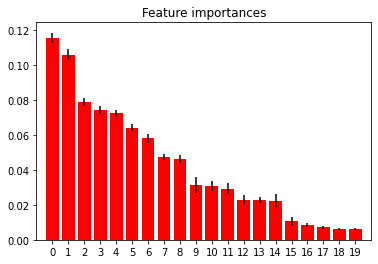

In [141]:
list_feature_importance(mdl_rf, X, 20)